In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

file = h5py.File("data/data.it000040.h5")

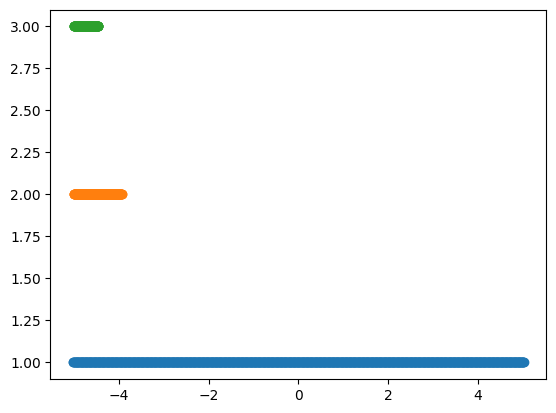

In [2]:
# plot grid

fig, ax = plt.subplots()


def lpad(x, width, fillchar):
    return str(x).zfill(width)


for l in range(1, 4):
    x = file[f"level{lpad(l, 2, '0')}"][f"x"]
    y = np.zeros_like(x)
    y[:] = l
    ax.scatter(
        x,
        y,
        label=f"level{lpad(l, 2, '0')}",
    )

plt.show()

In [3]:
file[f"level{lpad(l, 2, '0')}"][f"psi"]

<HDF5 dataset "psi": shape (216,), type "<f8">

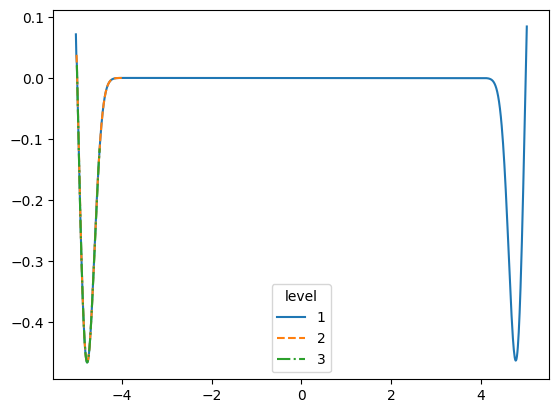

In [8]:
fig, ax = plt.subplots()

file = h5py.File("data/data.it002080.h5")

linestyles = ["-", "--", "-.", ":"]

for l in range(1, 4):
    ax.plot(file[f"level{lpad(l, 2, '0')}"]["x"][()], file[f"level{lpad(l, 2, '0')}"]["psi"][()], label=f"${l}$", linestyle=linestyles[l-1])

ax.legend(title="level")